In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

import os, sys
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Robobee analysis

In [23]:
# load all csv files from analyses
#path = "data_robobee/motionDynamics_robotic/"
path = "data_robobee/tmp_without_videos/robotic_dances/motion_dynamics_/"
dirs = os.listdir(path)

# sort it to have 
dirs.sort()
print(dirs)

['2011-08-31_13-38-25_ran.csv', '2011-08-31_13-38-25_rfv.csv', '2011-08-31_13-38-25_rsv.csv', '2011-08-31_13-38-25_wan.csv', '2011-08-31_13-38-25_wfv.csv', '2011-08-31_13-38-25_wsv.csv', '2011-09-03_16-39-39_ran.csv', '2011-09-03_16-39-39_rfv.csv', '2011-09-03_16-39-39_rsv.csv', '2011-09-03_16-39-39_wan.csv', '2011-09-03_16-39-39_wfv.csv', '2011-09-03_16-39-39_wsv.csv', '2011-09-06_13-58-27_ran.csv', '2011-09-06_13-58-27_rfv.csv', '2011-09-06_13-58-27_rsv.csv', '2011-09-06_13-58-27_wan.csv', '2011-09-06_13-58-27_wfv.csv', '2011-09-06_13-58-27_wsv.csv', '2011-09-10_14-04-09_1_ran.csv', '2011-09-10_14-04-09_1_rfv.csv', '2011-09-10_14-04-09_1_rsv.csv', '2011-09-10_14-04-09_1_wan.csv', '2011-09-10_14-04-09_1_wfv.csv', '2011-09-10_14-04-09_1_wsv.csv', '2011-09-10_14-04-09_2_ran.csv', '2011-09-10_14-04-09_2_rfv.csv', '2011-09-10_14-04-09_2_rsv.csv', '2011-09-10_14-04-09_2_wan.csv', '2011-09-10_14-04-09_2_wfv.csv', '2011-09-10_14-04-09_2_wsv.csv']


In [24]:
# sort the data into lists
wfv_list = [file for file in dirs if file.endswith("wfv.csv")]
rfv_list = [file for file in dirs if file.endswith("rfv.csv")]
wsv_list = [file for file in dirs if file.endswith("wsv.csv")]
rsv_list = [file for file in dirs if file.endswith("rsv.csv")]
wan_list = [file for file in dirs if file.endswith("wan.csv")]
ran_list = [file for file in dirs if file.endswith("ran.csv")]

In [25]:
# load dataframes 
wfv_df_list = [pd.read_csv(path+filename, header=None) for filename in wfv_list]
rfv_df_list = [pd.read_csv(path+filename, header=None) for filename in rfv_list]
wsv_df_list = [pd.read_csv(path+filename, header=None) for filename in wsv_list]
rsv_df_list = [pd.read_csv(path+filename, header=None) for filename in rsv_list]
wan_df_list = [pd.read_csv(path+filename, header=None) for filename in wan_list]
ran_df_list = [pd.read_csv(path+filename, header=None) for filename in ran_list]

In [26]:
# concatenate waggle and return per individual
fvelo_df = [pd.concat([wfv_df_list[i],rfv_df_list[i]], axis=1) for i in range(len(wfv_df_list))]
svelo_df = [pd.concat([wsv_df_list[i],rsv_df_list[i]], axis=1) for i in range(len(wsv_df_list))]
angle_df = [pd.concat([wan_df_list[i],ran_df_list[i]], axis=1) for i in range(len(wan_df_list))]

In [27]:
# df.values to calculate matrix from data frame

In [28]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a, axis=0), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [29]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

## 1) Forward velocity

In [30]:
# mean per individual
mean_fv = np.array([np.mean(fvelo_df[i], axis=0) for i in range(len(fvelo_df))])

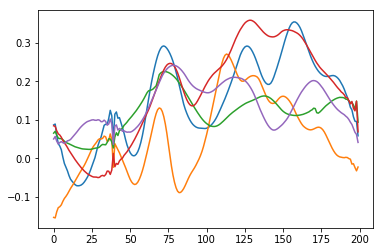

In [31]:
# mean curves per individual
for velocity in mean_fv:
    sns.lineplot([i for i in range(200)], velocity)

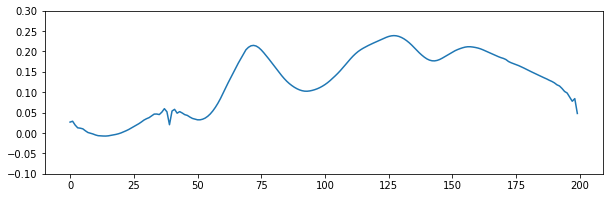

In [32]:
# mean over all individuals
mean_mean = np.mean(mean_fv, axis=0)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.3)  
plt.ylim(bottom=-0.1)  
sns.lineplot([i for i in range(200)], mean_mean) 

# ACHTUNG: auf 200 gesampled nicht wie in Paper auf 500!
# ACHTUNG: nur waggle return, nicht ein gesamter tanz-zyklus

In [12]:
# plot the confidence interval over all individuals means
mean, ub, lb = mean_confidence_interval(mean_distances)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.3)  
plt.ylim(bottom=-0.1)  
plot_mean_and_CI(mean, ub, lb, color_mean="red", color_shading="red")

NameError: name 'mean_distances' is not defined

## 2) Sidewards velocities

In [33]:
# mean per individual
mean_sv = np.array([np.mean(svelo_df[i], axis=0) for i in range(len(svelo_df))])

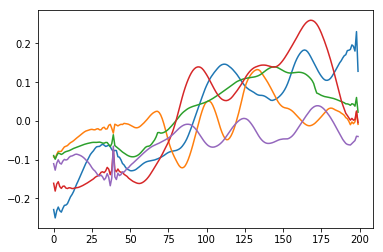

In [34]:
# mean curves per individual
for velocity in mean_sv:
    sns.lineplot([i for i in range(200)], velocity)

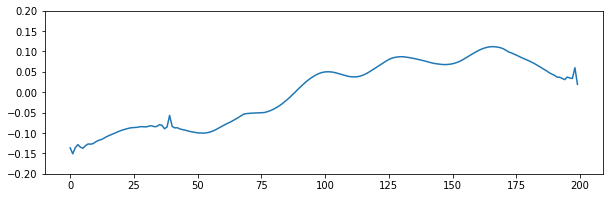

In [35]:
# mean over all individuals
mean_mean_s = np.mean(mean_sv, axis=0)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.2)  
plt.ylim(bottom=-0.2)
sns.lineplot([i for i in range(200)], mean_mean_s)

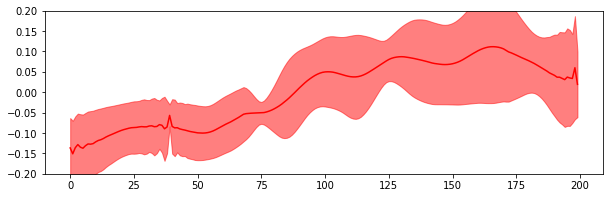

In [36]:
# plot the confidence interval over all individuals means
mean, ub, lb = mean_confidence_interval(mean_sv)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.2)  
plt.ylim(bottom=-0.2)
plot_mean_and_CI(mean, ub, lb, color_mean="red", color_shading="red")

## 3) Angles

In [37]:
# mean per individual
mean_a = np.array([np.mean(angle_df[i], axis=0) for i in range(len(angle_df))])

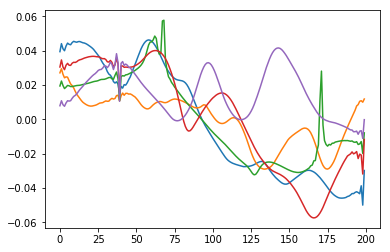

In [38]:
# mean curves per individual
for angle in mean_a:
    sns.lineplot([i for i in range(200)], angle)

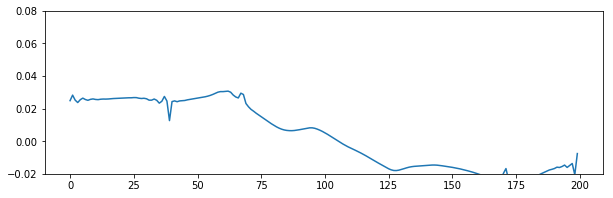

In [39]:
# mean over all individuals
mean_mean_a = np.mean(mean_a, axis=0)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.08)  
plt.ylim(bottom=-0.02)
sns.lineplot([i for i in range(200)], mean_mean_a)

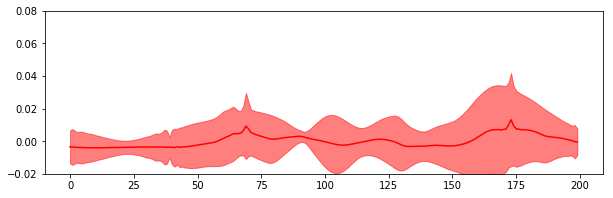

In [47]:
# plot the confidence interval over all individuals means
mean, ub, lb = mean_confidence_interval(mean_a)
fig = plt.figure(figsize=(10, 3))
plt.ylim(top=0.08)  
plt.ylim(bottom=-0.02)
plot_mean_and_CI(mean, ub, lb, color_mean="red", color_shading="red")